In [29]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import random

In [18]:
def sign(p):
    if p > 0.0:
        return 1.0
    else:
        return -1.0

In [52]:
def generate_data(N = 20):
    X = []
    Y = []
    for i in range(N):
        x1 = random.uniform(-1.0, 1.0)
        x2 = random.uniform(-1.0, 1.0)
        X.append([x1,x2])
        temp = sign(x1**2 + x2**2 - 0.6)
        if np.random.randint(10) == 0:  # noise
            temp = -temp
        Y.append(temp)
    return X, Y

In [53]:
def feature_trans(X):
    new_X = []
    for item in X:
        temp = [1, item[0], item[1], item[0]*item[1], item[0]*item[0], item[1]*item[1]]
        new_X.append(temp)
    return new_X

In [70]:
data_x, data_y = generate_data(1000)
# print(data_x, data_y)
new_datax = feature_trans(data_x)
# print(new_datax)

In [72]:
def cnt_eout(data_x, data_y):
    err = 0.0
    n = len(data_y)
#     print(n)
    w = [-1,-0.05,0.08,0.13,1.5,1.5]
    for i in range(n):
#         print(data_x[i])
        pred = sign(np.dot(w, data_x[i]))
#         print(pred)
#         print(data_y[i])
        if pred != data_y[i]:
            err = err+1
#     print(err)
    return err/float(n)
        

In [82]:
# a = cnt_eout(new_datax, data_y)
all_err = []
iter_num = 1000
for _ in range(iter_num):
    data_x, data_y = generate_data(1000)
    new_datax = feature_trans(data_x)
    temp_err = cnt_eout(new_datax, data_y)
#     print(temp_err)
    all_err.append(temp_err)

result = sum(all_err)/float(iter_num)
    

avg Eout: 0.14225200000000032


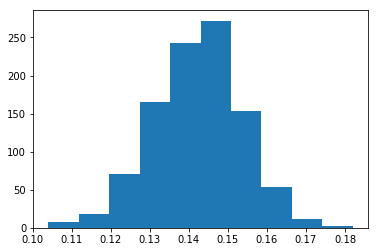

In [83]:
print("avg Eout:", result)
plt.hist(all_err)
plt.show()